# Project Goal

The online store Ice, which sells video games all over the world, would like to understand user behavior for its game sales. Ice would like to identify patterns that determine whether a game succeeds or not. This will allow the company to spot potential big winners and plan advertising campaigns.

## Initializing Data

Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('games.csv')

In [3]:
# Checking the dataframe
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Data Description

In [4]:
# Reviewing general info on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataframe contains 16715 rows and 11 columns including:

 - Name
 - Platform
 - Year_of_Release
 - Genre
 - NA_sales (North American sales in USD million)
 - EU_sales (sales in Europe in USD million)
 - JP_sales (sales in Japan in USD million)
 - Other_sales (sales in other countries in USD million)
 - Critic_Score (maximum of 100)
 - User_Score (maximum of 10)
 - Rating (ESRB) The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [5]:
# Checking the percentages of missing values
data.isnull().sum()/len(data)

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

# Data Preprocessing

At first glance, the dataframe has several issues:

The column names need to be converted to lowercase.

There are several columns with missing values: 'year_of_release' has 1.6%, 'name' has .012%, 'genre' has .012%, 'critic_score' has 51%, 'user_score' has 40%, and 'rating' has 40% missing values. 

These missing values may result from an error in the data collection such as a technical error or a processing error. For example, some of the data may have not been filled in properly.

We will need to decide how to handle these missing values as we prepare the data. 

Since the percentage of rows with missing values in 'year_of_release', 'name' and 'genre' is relatively low, we will drop their rows with missing values. On the other hand, since the number of rows with missing values in 'critic_score', 'user_score', and 'rating' is so significant, we will keep these rows and leave the missing values as is.

The 'year_of_release' needs to be converted from a float to an integer type. The 'user_score' needs to be changed from an object type to a float for future calculations.

In [6]:
# Changing column names to lower case
data.columns= data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Dropping rows with NaN values in 'year_of_release', 'name', and 'genre'

# Drop rows which contain any NaN value in the selected columns
data = data.dropna(subset=['year_of_release', 'name', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


After dropping rows with NaN values, the dataframe was reduced by 1.6% to 16444 rows.

In [8]:
# Converting 'year_of_release' to an integer
data['year_of_release'] = data['year_of_release'].astype(int)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


When trying to convert 'user_score' to a float type, we found a string 'tbd' in the column. Let's check unique values in 'user_score'.

In [9]:
# Checking values in 'user_score'

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There are NaN values and a string value 'tbd' in 'user_score'. It is unclear why the column contains both NaN values and 'tbd' values. We presume that 'tbd' stands for 'to be determined' which essentially is the same as a missing value. Maybe there were two different methods for data collection and one offered 'tbd' as an option. Before we can convert this column to a float type, we need to replace the 'tbd' with a NaN value. 

Let's replace 'tbd' with NaN and convert 'user_score' to a float in one step.

In [10]:
# Replacing 'tbd' with nan and converting 'user_score' to a float

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [11]:
# Rechecking percentage of NaN values in 'user_score'
data['user_score'].isnull().sum()/len(data)

0.5461566528825104

The number of missing values in 'user_score' jumped from 40% to 54% after converting 'tbd' to NaN values.
There is a significant number of missing values in 'user_score' (55%), 'critic_score' (51%), and rating (40%).

The missing values may have been the result of users not filling in a value or due to a technical error.
Yet, there is no clear method we can use to accurately fill them. Let's leave these missing values as is.

## Enriching the Data

We will create a column calculating the total sales for future analysis.

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Exploratory Data Analysis <a class="anchor" id="chapter2"></a>
We need to collect data that will help us make a prognosis for what sales will be like in 2017. So let's identify the pattern of games released across the years.

## Years Released   <a class="anchor" id="section_2_1"></a>

Let's look at how many games were released in different years. We will create a function to plot histograms and apply it to 'year_of_release'.

In [15]:
# Creating a function to plot histograms
 
def hist_plot(data, column):
        fig, ax = plt.subplots(1, 1)
        ax.hist(data[column], bins=100)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('frequency')
        plt.show()

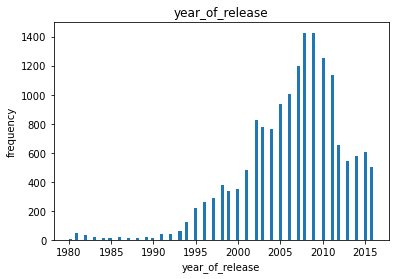

In [16]:
# Plotting the distribution of 'year_of_release'
hist_plot(data, 'year_of_release')

The data ranges from years 1980-2016. The years ranging from 1980-1993 have less than 100 games released. Starting from 1994 and on, the number of games released per year increased from over 100 to a peak in 2008-2009 at around 1400. After 2009, the number of games released per year declined, yet it was still around 500 games per year across platforms. 

## Platforms <a class="anchor" id="section_2_2"></a>

Let's explore the data based on different platforms. There are many rows of data so we will set the display limit to 240 so we can see all of the rows based on the platform and year of release.

In [17]:
pd.set_option('display.max_rows', 240)

In [18]:
# Checking the data on games based on platform

data.groupby(['platform', 'year_of_release']).sum()

na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                              
2600     1980                10.59      0.67      0.00         0.12   
         1981                33.40      1.96      0.00         0.32   
         1982                26.92      1.65      0.00         0.31   
         1983                 5.44      0.34      0.00         0.06   
         1984                 0.26      0.01      0.00         0.00   
         1985                 0.42      0.03      0.00         0.00   
         1986                 0.63      0.04      0.00         0.00   
         1987                 1.84      0.09      0.00         0.01   
         1988                 0.69      0.04      0.00         0.01   
         1989                 0.59      0.03      0.00         0.01   
3DO      1994                 0.00      0.00      0.02         0.00   
         1995                 0.00      0.00      0.08         0.00   
3DS      2011                27.34     18.63     12.83         4.40   
         2012                17.11     11.68     19.98         2.59   
         2013                15.56     14.84     23.57         2.60   
         2014                12.33      8.73     20.69         2.01   
         2015                 6.17      5.06     15.52         1.03   
         2016                 4.14      2.33      8.03         0.64   
DC       1998                 1.26      0.61      1.43         0.08   
         1999                 1.64      0.29      3.17         0.06   
         2000                 2.53      0.79      2.54         0.13   
         2001                 0.00      0.00      1.07         0.00   
         2002                 0.00      0.00      0.29         0.00   
         2007                 0.00      0.00      0.02         0.00   
         2008                 0.00      0.00      0.04         0.00   
DS       1985                 0.00      0.00      0.02         0.00   
         2004                 8.33      3.93      3.65         1.36   
         2005                47.99     41.49     29.86        10.80   
         2006                50.01     23.07     38.56         8.17   
         2007                75.25     33.79     26.81        11.09   
         2008                78.12     32.24     24.01        10.94   
         2009                60.95     25.83     24.21         8.55   
         2010                40.80     18.82     19.86         5.54   
         2011                14.27      5.71      4.32         1.88   
         2012                 4.02      2.68      3.72         0.59   
         2013                 0.57      0.85      0.00         0.12   
GB       1988                 0.82      0.23      0.35         0.03   
         1989                39.81      7.60     16.16         1.40   
         1990                 2.24      0.89      1.33         0.43   
         1991                 1.43      0.68      3.38         0.08   
         1992                13.10      4.24      7.51         0.64   
         1994                 6.03      2.36      3.19         0.60   
         1995                 0.69      0.14      2.72         0.05   
         1996                12.66      9.37     12.91         1.09   
         1997                 2.09      0.90      3.26         0.12   
         1998                 9.44      7.00      9.55         0.91   
         1999                16.21      8.91     11.75         1.13   
         2000                 6.39      3.52      8.36         1.49   
         2001                 2.73      1.67      4.65         0.19   
GBA      2000                 0.05      0.02      0.00         0.00   
         2001                36.24     15.92      7.46         1.91   
         2002                43.02     17.12     12.21         1.81   
         2003                33.53     13.19      8.59         1.36   
         2004                44.43     18.15     13.52         1.81   
         2005                21.70      8.31      

There are platforms that performed well but then stopped releasing games over time. We need to explore this further with visualizations.

## Platforms with Highest Sales <a class="anchor" id="section_2_3"></a>

Let's plot platforms with the greatest total sales so we see how long it takes for platforms sales to grow and fade.

First, we will find platforms with the highest total sales and use these for our plot.

In [19]:
# Aggregating total_sales per platform

data.pivot_table(index='platform',values='total_sales',aggfunc=np.sum).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The platforms with the greatest total sales over time, over 500, are DS, PS, PS2, PS3, Wii, X360.

## Top Platforms <a class="anchor" id="section_2_4"></a>

We will explore the distribution of sales over the years for six platforms with the greatest total annual sales over time, sales over 500: DS, PS, PS2, PS3, Wii, X360 to identify any patterns.

In [20]:
# Filtering the data to create a dataframe

platform_sales=data.loc[data['platform'].isin(["DS","PS", "PS2", "PS3", "Wii", "X360"])]

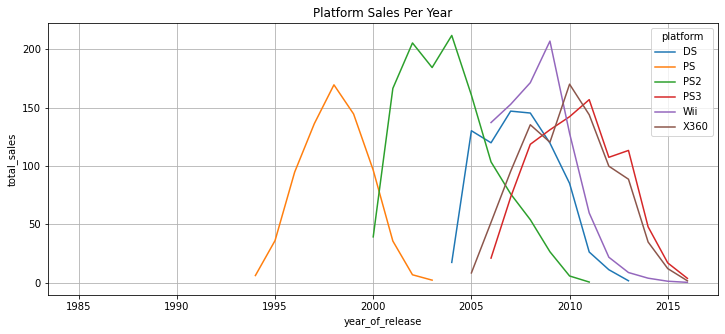

In [21]:
platform_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.line(grid=True, figsize=(12, 5))

plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("Platform Sales Per Year")
plt.show()

The plot demonstrates that there is around a ten year period over which platform sales tend to rise and then decline. This can be seen in the inverted "v", "u" and "w" shapes of the platform sales over time. It is particularly noticeable in the sales for PS, PS2, PS3, Wii and X360. After around a ten year period, the sales on these platforms approached zero. It is helpful to keep this trend of gradual rising and declining over ten years in mind as we predict sales for 2017.

## Top Current Platforms <a class="anchor" id="section_2_5"></a>

We need to analyze the data to know how to choose which games and platforms have the most potential for 2017. Let's filter the data for platforms that released games in 2013-2016 and focus on the platforms with the highest total sales.

In [22]:
# Aggregating the data to sort platforms that released games in 2013-2016 based on total sales

current_platforms=data.loc[data['year_of_release'] >=2013]
current_platforms.pivot_table(index='platform',values='total_sales',aggfunc=np.sum).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [23]:
# Filtering the data to select platforms with highest total sales that released games in 2013-2016

current_top_platforms=current_platforms.loc[current_platforms['platform'].isin(["3DS","PS3", "PS4", "X360", "XOne"])]
current_top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


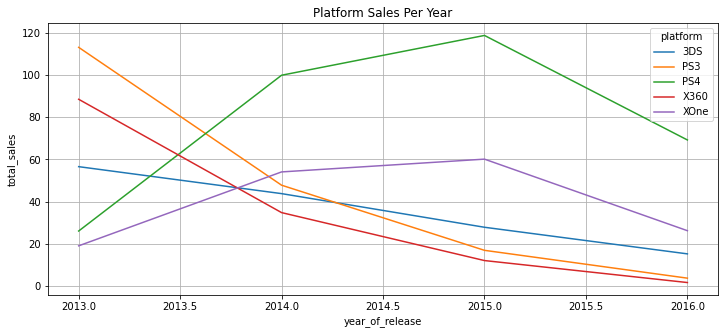

In [24]:
# Plotting the sales per year for the current top selling platforms

current_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.line(grid=True, figsize=(12, 5))

plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("Platform Sales Per Year")
plt.show()

The top selling platforms that released games in 2013-2016 appear to be in the declining part of the trend for platforms. The peaks seem to have been reached before 2013 for 3DS, X360, and PS3, and in 2015 for PS4 and XOne. We need to take this trend information into account when creating a marketing strategy for 2017.

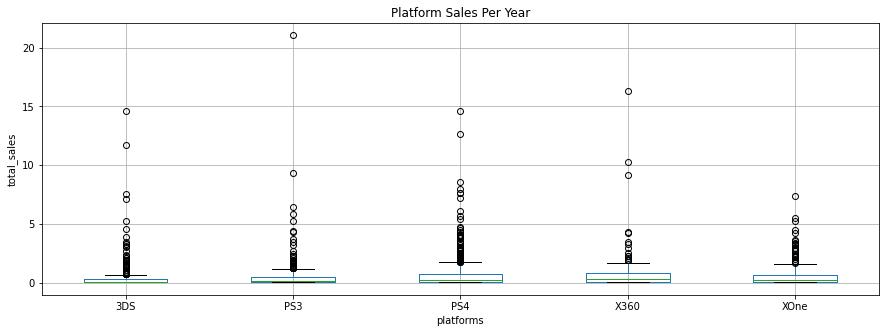

In [25]:
current_top_platforms.pivot(values='total_sales', columns='platform').boxplot(figsize=(15,5))
plt.xlabel("platforms")
plt.ylabel("total_sales")
plt.title("Platform Sales Per Year")
plt.show()

Based on the boxplot of sales per platform, the range of sales across platforms is similar. There is a slightly lower range for sales in 3DS yet we would need to check if this difference is statistically significant. The average sales is similar across platforms.

## Game Reviews and Sales <a class="anchor" id="section_2_6"></a>

Let's explore how user and professional reviews affect sales. We will use data for the PS4 platform. We'll build a scatter plot and calculate the correlation between reviews and sales.

In [26]:
# Filtering the data for PS4

PS4 = current_top_platforms.loc[current_top_platforms['platform'] == 'PS4']

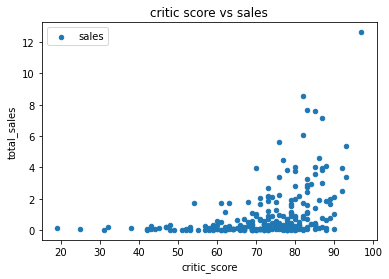

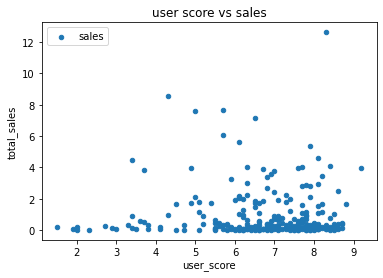

In [27]:
# Creating scatterplots to visualize the correlation between critics scores and sales, and user scores and sales

PS4.plot.scatter(x='critic_score', y='total_sales', label='sales')
plt.title("critic score vs sales")
PS4.plot.scatter(x='user_score', y='total_sales', label='sales')
plt.title("user score vs sales")
plt.legend()
plt.show()

Based on the scatterplots, there appears to be a positive correlation between critic scores and sales such that the higher the critic scores the higher the sales for a game. Yet, there is no correlation between user scores and sales such that even games with lower user scores had higher sales.

In [28]:
# Calculation the correlation between reviews and sales

review_corr_data = pd.DataFrame().assign(critic_score=PS4['critic_score'], user_score=PS4['user_score'], total_sales=PS4['total_sales'])
review_corr_data.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Statiscal analysis found a moderate positive correlation between critic scores and total sales. There was no correlation between user scores and total sales.

## Top Selling Games <a class="anchor" id="section_2_7"></a>

Let's look more closely at the top selling games on PS4 and compare their performance on other platforms. We need to aggregate the total sales in the PS4 data and select the top 10 games with the highest sales to use for our analysis.

In [29]:
# Filtering data in PS4 to select top performing games

top_games = PS4.pivot_table(index='name',values='total_sales',aggfunc=np.sum).sort_values(by='total_sales', ascending=False)
top_games.head(10)

,total_sales
name,
Call of Duty: Black Ops 3,14.63
Grand Theft Auto V,12.62
FIFA 16,8.58
Star Wars Battlefront (2015),7.98
Call of Duty: Advanced Warfare,7.66
FIFA 17,7.60
Fallout 4,7.17
FIFA 15,6.08
Destiny,5.64


Focusing on the top 10 performing games in PS4, we will filter current_top_platforms to focus on these games.

In [30]:
# Slicing the data to focus on top 10 performing games in PS4

top_games_sales=current_top_platforms.loc[current_top_platforms['name'].isin(["Call of Duty: Black Ops 3", "Grand Theft Auto V", "FIFA 16" ,"Star Wars Battlefront (2015)", "Call of Duty: Advanced Warfare","FIFA 17","Fallout 4", "FIFA 15", "Destiny", "Uncharted 4: A Thief's End"])]

Let's compare the sales for the top performing games on PS4 with the same games on other platforms using a boxplot.

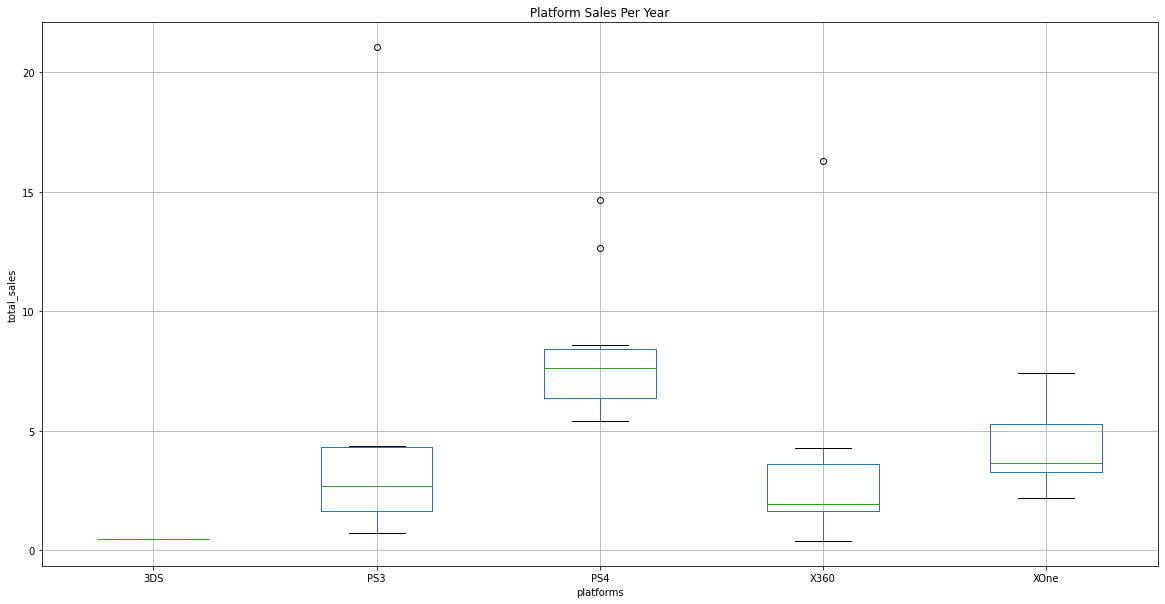

In [31]:
# Comparing the sales for the top performing games on PS4 with the same games on other platforms.

top_games_sales.pivot(index='name', columns='platform', values='total_sales').boxplot(figsize=(20,10))
plt.xlabel("platforms")
plt.ylabel("total_sales")
plt.title("Platform Sales Per Year")
plt.show()

The sales of the top performing games on PS4 did not perform as well on the other platforms. Based on the boxplots, there is a difference between the sales for these games on PS4 and other platforms, such that the average sales for these games was higher on PS4 than for any other platform.

Let's use a grouped bar chart to see the total sales per platform for each of the top 10 performing games on PS4 more clearly.

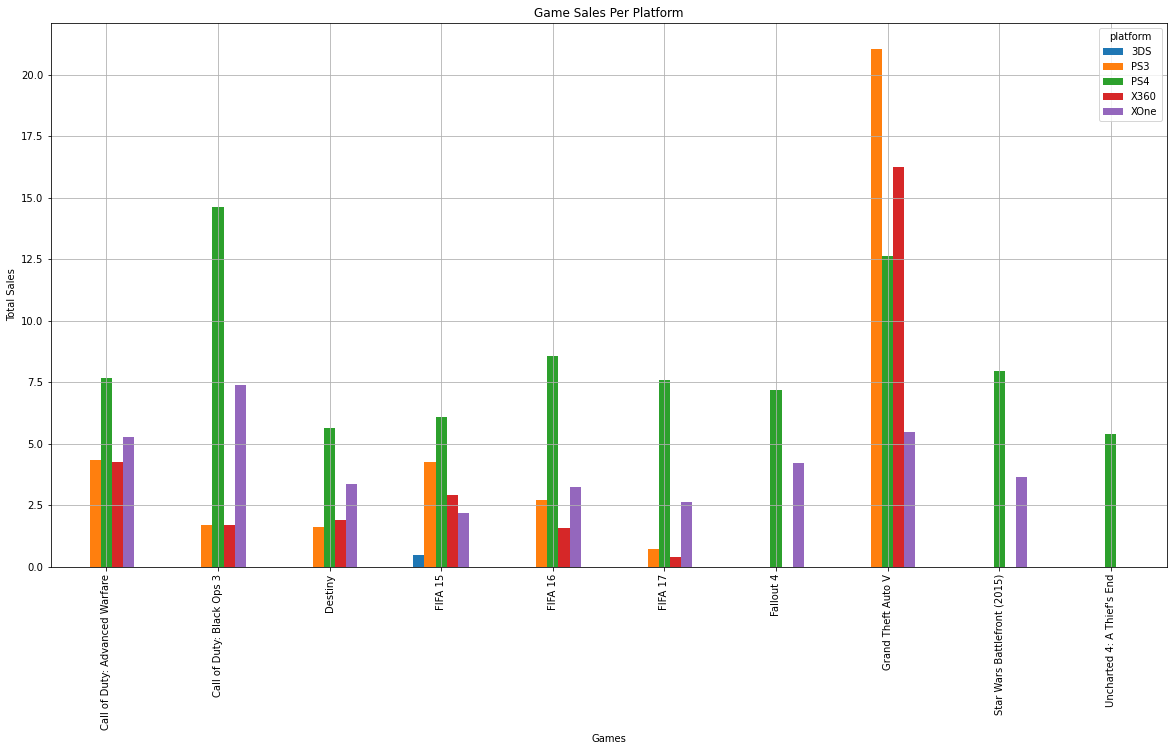

In [32]:
# Plotting sales for the top performing games on PS4 across platforms

top_games_sales = top_games_sales.pivot_table(index='name', columns= 'platform', values='total_sales', aggfunc=np.sum)
top_games_sales.plot(kind='bar', figsize=(20,10))

plt.xlabel("Games")
plt.ylabel("Total Sales")
plt.title("Game Sales Per Platform")
plt.grid(True)
plt.show()

Based on the barchart for the top 10 games on PS4, there was a range of performance. The top three performing games across platforms in general were Grand Theft Auto V, Call of Duty: Black Ops 3, and Call of Duty: Advanced Warfare. Even though on PS4 Call of Duty: Black Ops 3 had the highest sales, Grand Theft Auto V and Call of Duty: Advanced Warfare outperformed this game on PS3 and X360. For 3DS, FIFA 15 was the only game with sales. There is clearly a difference in game performance per platform.

## Game Genres <a class="anchor" id="section_2_8"></a>

Let's explore the general distribution of games by genre to identify the most profitable genres.

In [33]:
games_genres = data.loc[data['year_of_release'] >=2013] \
    .groupby('genre') \
    .agg(total_sales=('total_sales', 'sum')) \
    .sort_values(by='total_sales', ascending=False) \
    .reset_index()

games_genres.head(50)

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Games performance varied by genre: Between 2013-2016, combined total_sales for the top 5 games per genre was: Action- 322, Shooter- 233, Sports- 150, Role-Playing- 146, and Misc- was 63. It seems that games that involved action and shooting had higher sales, while games with less action had lower sales. Yet, the genre categorization is somewhat unclear since there are separate categories for action, shooter, fighting, and adventure. We would need clarification about these categories to draw further conclusions. There are 11 categories for genre. We will select the top 5 genres and visualize their distribution.

In [34]:
# Slicing the data to focus on top 5 genres in 2013-2016

top_genres=games_genres.loc[games_genres['genre'].isin(["Action", "Shooter", "Sports", "Role-Playing", "Misc"])]
                                                         
top_genres.head()

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82


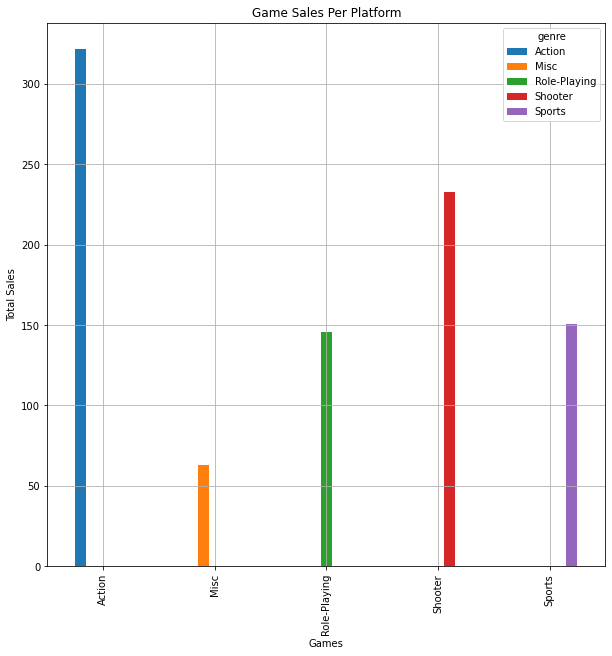

In [35]:
# Plotting the distribution of games by genre

top_genres.pivot_table(index='genre', columns= 'genre', values='total_sales', aggfunc=np.sum) \
    .plot(kind='bar', figsize=(10,10)) \

plt.xlabel("Games")
plt.ylabel("Total Sales")
plt.title("Game Sales Per Platform")
plt.grid(True)
plt.show()

We can see that sales of the genres Action and Shooter greatly exceed the sales of other genres.

## Regional Sales<a class="anchor" id="chapter3"></a>

We need to understand market share per region. We will analyze data on regional sales per platform and per genre.

### Regional Sales Per Platform <a class="anchor" id="section_3_1"></a>

We need to analyze sales by region (NA, EU, JP). We will use the top five performing platforms in 2013-2016 to analyze their variations in market share.

We will visualize the variation in market share per region per platform using a 3-column barplot.

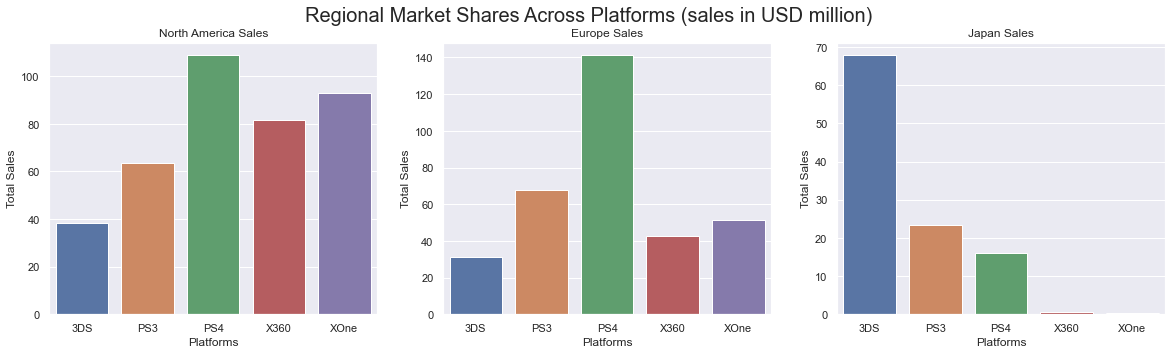

In [36]:
#Plotting a multiple column barplot for Regional Market Shares Per Platform

#set seaborn plotting aesthetics as default
sns.set()

na = current_top_platforms\
    .groupby(["platform"]) \
    .agg(na_sales=('na_sales', 'sum')) \
    .reset_index()

eu = current_top_platforms\
    .groupby(["platform"]) \
    .agg(eu_sales=('eu_sales', 'sum')) \
    .reset_index()

jp = current_top_platforms\
    .groupby(["platform"]) \
    .agg(jp_sales=('jp_sales', 'sum')) \
    .reset_index()


#define plotting region (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Regional Market Shares Across Platforms (sales in USD million)', fontsize=20)


#create barplot in each subplot
sns.barplot(data=na, x='platform', y='na_sales', ax=axs[0])
axs[0].set_title('North America Sales', fontsize=12)
axs[0].set_ylabel('Total Sales', fontsize=12)
axs[0].set_xlabel('Platforms', fontsize=12)


sns.barplot(data=eu, x='platform', y='eu_sales', ax=axs[1])
axs[1].set_title('Europe Sales', fontsize=12)
axs[1].set_ylabel('Total Sales', fontsize=12)
axs[1].set_xlabel('Platforms', fontsize=12)


sns.barplot(data=jp, x='platform', y='jp_sales', ax=axs[2])
axs[2].set_title('Japan Sales', fontsize=12)
axs[2].set_ylabel('Total Sales', fontsize=12)
axs[2].set_xlabel('Platforms', fontsize=12)

plt.show()

We can see from this multiple barplot that platform sales vary across regions. The highest performing platforms were PS4 for North America and Europe and 3DS for Japan. The lowest performing platforms were 3DS for North America and Europe, and XOne for Japan.

### Regional Sales Per Genre <a class="anchor" id="section_3_2"></a>

Now let's analyze sales by region for the top five performing genres in 2013-2016 to analyze their variations in market share.

In order to analyze by the top five peforming genres, we need to slice the data.

In [37]:
# Slicing data to get top 5 genres in 2013-2016

top_genres= data.loc[(data['year_of_release'] >=2013) & (data['genre'].isin(["Action", "Shooter", "Sports", "Role-Playing", "Misc"]))]
top_genres.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


We will visualize the variation in market share per region per genre using a 3-column barplot.

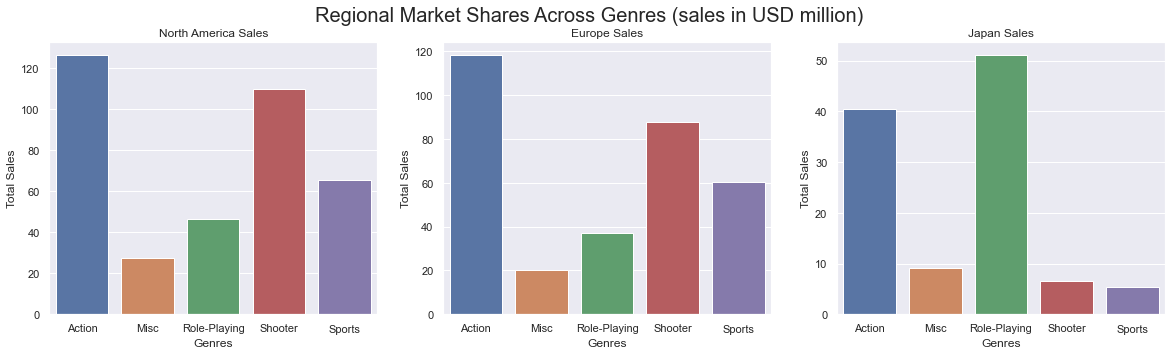

In [38]:
#Plotting a multiple column barplot for Regional Market Shares Per Genre

#set seaborn plotting aesthetics as default
sns.set()

na_genre = top_genres\
    .groupby(["genre"]) \
    .agg(na_sales=('na_sales', 'sum')) \
    .reset_index()

eu_genre = top_genres\
    .groupby(["genre"]) \
    .agg(eu_sales=('eu_sales', 'sum')) \
    .reset_index()

jp_genre = top_genres\
    .groupby(["genre"]) \
    .agg(jp_sales=('jp_sales', 'sum')) \
    .reset_index()


#define plotting region (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Regional Market Shares Across Genres (sales in USD million)', fontsize=20)


#create barplot in each subplot
sns.barplot(data=na_genre, x='genre', y='na_sales', ax=axs[0])
axs[0].set_title('North America Sales', fontsize=12)
axs[0].set_ylabel('Total Sales', fontsize=12)
axs[0].set_xlabel('Genres', fontsize=12)


sns.barplot(data=eu_genre, x='genre', y='eu_sales', ax=axs[1])
axs[1].set_title('Europe Sales', fontsize=12)
axs[1].set_ylabel('Total Sales', fontsize=12)
axs[1].set_xlabel('Genres', fontsize=12)


sns.barplot(data=jp_genre, x='genre', y='jp_sales', ax=axs[2])
axs[2].set_title('Japan Sales', fontsize=12)
axs[2].set_ylabel('Total Sales', fontsize=12)
axs[2].set_xlabel('Genres', fontsize=12)

plt.show()

The market share per genre varied per region. Action games were popular across regions, but Japan had a unique market for Role-Playing games. In North America and Europe, sales for Action was highest, followed by Shooter. Yet, in Japan, Role-Playing was highest, followed by Action. 

### Regional Sales per ESRB rating <a class="anchor" id="section_3_3"></a>

Let's check how ESRB ratings affect sales in individual regions. Let's slicing the data based on ESRB rating and group sales based on region for our plot

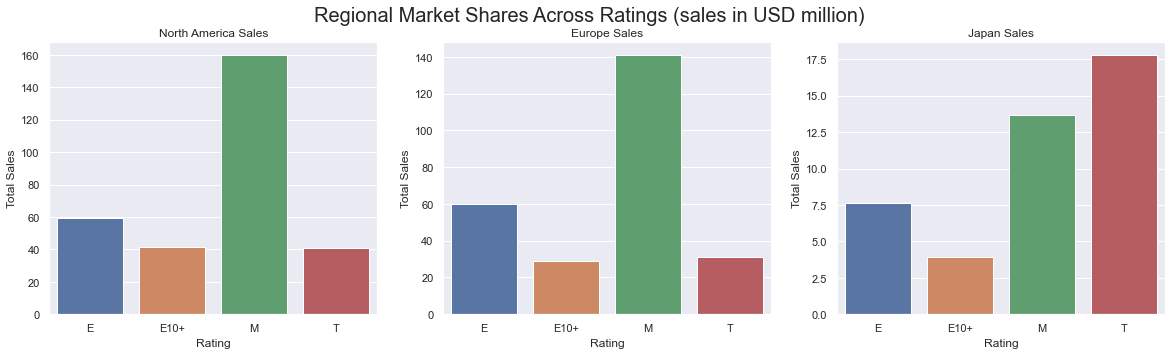

In [39]:
#Plotting a multiple column barplot for Regional Market Shares Per Genre

#set seaborn plotting aesthetics as default
sns.set()

na_genre = top_genres\
    .groupby(["rating"]) \
    .agg(na_sales=('na_sales', 'sum')) \
    .reset_index()

eu_genre = top_genres\
    .groupby(["rating"]) \
    .agg(eu_sales=('eu_sales', 'sum')) \
    .reset_index()

jp_genre = top_genres\
    .groupby(["rating"]) \
    .agg(jp_sales=('jp_sales', 'sum')) \
    .reset_index()


#define plotting region (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Regional Market Shares Across Ratings (sales in USD million)', fontsize=20)


#create barplot in each subplot
sns.barplot(data=na_genre, x='rating', y='na_sales', ax=axs[0])
axs[0].set_title('North America Sales', fontsize=12)
axs[0].set_ylabel('Total Sales', fontsize=12)
axs[0].set_xlabel('Rating', fontsize=12)


sns.barplot(data=eu_genre, x='rating', y='eu_sales', ax=axs[1])
axs[1].set_title('Europe Sales', fontsize=12)
axs[1].set_ylabel('Total Sales', fontsize=12)
axs[1].set_xlabel('Rating', fontsize=12)


sns.barplot(data=jp_genre, x='rating', y='jp_sales', ax=axs[2])
axs[2].set_title('Japan Sales', fontsize=12)
axs[2].set_ylabel('Total Sales', fontsize=12)
axs[2].set_xlabel('Rating', fontsize=12)

plt.show()

Based on these barplots, ESRB rating affected sales in individual regions. Games rated "M" for Mature had the most market share in North America and Europe, followed by E ratings for Everyone ages 6+ while games rated "T" for Teen had the most market share in Japan, followed by Mature ratings.

# Testing Statistical Hypotheses <a class="anchor" id="chapter4"></a>

We will test average user ratings for different platforms and for different genres to see if average user rating vary between platforms or between genres.

We will evaluate if the average user ratings of the Xbox One and PC platforms are the same.

Null Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
Alternative Hypothesis: Average user ratings of the Xbox One and PC platforms differ.
We will use a ttest_ind since there are two independent samples.
We will use an alpha level of 0.05.

Before we can test the hypothesis, we need to filter our dataframe for XOne and PC.

In [40]:
# Filtering data for XOne and PC

xone = data.loc[data['platform'] == 'XOne']
pc = data.loc[data['platform'] == 'PC']

Since there are NaN values in our samples, we will use a student's t-test with a parameter for omitting nan values.

In [41]:
# Creating a function to test hypothesis

def ttest(sample1, sample2):

    alpha = 0.05
    results = stats.ttest_ind(sample1,sample2, nan_policy='omit')

    print('p-value: ', results.pvalue) 

    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis")

In [42]:
# Testing the hypothesis
ttest(xone['user_score'], pc['user_score'])

p-value:  1.3037979620152955e-05
We reject the null hypothesis


The p-value was close to zero indicating that the chances of obtaining this result by chance are very small and our results are statistically significant. We reject the null hypothesis: Average user ratings of the Xbox One and PC platforms differ.

Now let's evaluate if the average user ratings for the Action and Sports genres are different.

Null Hypothesis: Average user ratings for the Action and Sports genres are different.
Alternative Hypothesis: Average user ratings for the Action and Sports genres are not different.
We will use a ttest_ind since there are two independent samples.
We will use an alpha level of 0.05.

Before we can test the hypothesis, we need to filter our dataframe for Action and Sports.

In [43]:
#Filtering data Before we can test the hypothesis, we need to filter our dataframe for Action and Sports.

action = data.loc[data['genre'] == 'Action']
sports = data.loc[data['genre'] == 'Sports']

In [44]:
# Testing the hypothesis
ttest(action['user_score'], sports['user_score'])

p-value:  0.06480928064412463
We can't reject the null hypothesis


The p-value for our test was greater than our alpha level of 0.05, indicating that we cannot reject the null hypothesis: Average user ratings for the Action and Sports genres are not different. 

General Conclusion

We analyzed data from Ice to understand user behavior for its game sales and to identify patterns that determine whether a game succeeds or not. This will allow the company to spot potential big winners and plan advertising campaigns.
 
Data Preprocessing
At first glance, the data had several issues:
The column names need to be converted to lowercase.

There were several columns with missing values: 'year_of_release' has 1.6%, 'name' has .012%, 'genre' has .012%, 'critic_score' has 51%, 'user_score' has 40%, and 'rating' has 40% missing values.

These missing values may have resulted from an error in the data collection such as a technical error or a processing error. For example, some of the data may have not been filled in properly.

Since the percentage of rows with missing values in 'year_of_release', 'name' and 'genre' was relatively low, we dropped their rows with missing values. After dropping rows with NaN values, the data was reduced by 1.6% to 16444 rows.

On the other hand, since the number of rows with missing values in 'critic_score', 'user_score', and 'rating' was so significant, and there was no clear method to accurately fill them, we decided to keep these rows and leave the missing values as is. The ‘user_score’ column contained NaN and TBD values aside from numeric values. We presumed that 'tbd' stands for 'to be determined' which essentially is the same as a missing value. Maybe there were two different methods for data collection and one offered 'tbd' as an option. Before we could convert this column to a float type, we needed to replace the 'tbd' with a NaN value. The number of missing values in 'user_score' jumped from 40% to 54% after converting 'tbd' to NaN values.
The 'year_of_release' was converted from a float to an integer type. The 'user_score' was changed from an object type to a float for future calculations.
 
Data Enrichment
We created a column calculating total sales for future analysis.
 
Data Analysis
We needed to analyze data to help us make a prognosis for what sales would be like in 2017. 
Years Released
The data ranged from years 1980-2016. The years ranging from 1980-1993 had less than 100 games released. Starting from 1994 and on, the number of games released per year increased from over 100 to a peak in 2008-2009 at around 1400. After 2009, the number of games released per year declined, yet it was still around 500 games per year across platforms.
 
Platforms
 
There were platforms that performed well but then stopped releasing games over time. We explored this further with visualizations. We plotted platforms with the greatest total sales to see how long it takes for platforms sales to grow and fade. Across the entire dataframe, the platforms with the greatest total sales over time, over 500, were DS, PS, PS2, PS3, Wii, X360. We explored the distribution of sales over time using a line plot.. The plot demonstrated that there is around a ten year period over which platform sales tend to rise and then decline. This can be seen in the inverted "v", "u" and "w" shapes of the platform sales over time. It is particularly noticeable in the sales for PS, PS2, PS3, Wii and X360. After around a ten year period, the sales on these platforms approached zero. It is helpful to keep this trend of gradual rising and declining over ten years in mind as we predict sales for 2017.
 
Top Current Platforms
We selected data from 2013-2016, because recent data would be most relevant to predict trends for 2017. Based on line plots, the top selling platforms that released games in 2013-2016 appear to be in the declining part of the trend for platforms. The peaks seem to have been reached before 2013 for 3DS, X360, and PS3, and in 2015 for PS4 and XOne. We need to take this trend information into account when creating a marketing strategy for 2017.
Based on the boxplot of sales per platform, the range of sales across platforms was similar. There was a slightly lower range for sales in 3DS yet we would need to check if this difference is statistically significant. The average sales was similar across platforms.

Game Reviews and Sales 
Based on scatterplots, there appeared to be a positive correlation between critic scores and sales such that the higher the critic scores the higher the sales for a game. Yet, there was no correlation between user scores and sales such that even games with lower user scores had higher sales.
Statiscal analysis found a moderate positive correlation between critic scores and total sales. There was no correlation between user scores and total sales.

Top Selling Games
The sales of the top performing games on PS4 did not perform as well on the other platforms. Based on the boxplots, there was a difference between the sales for these games on PS4 and other platforms, such that the average sales for these games was higher on PS4 than for any other platform.
Based on the barchart for the top 10 games on PS4, there was a range of performance. The top three performing games across platforms in general were Grand Theft Auto V, Call of Duty: Black Ops 3, and Call of Duty: Advanced Warfare. Even though on PS4 Call of Duty: Black Ops 3 had the highest sales, Grand Theft Auto V and Call of Duty: Advanced Warfare outperformed this game on PS3 and X360. For 3DS, FIFA 15 was the only game with sales. There is clearly a difference in game performance per platform.
 
Game Genres
Games performance varied by genre: Between 2013-2016, combined total_sales for the top 5 games per genre was: Action- 322, Shooter- 233, Sports- 150, Role-Playing- 146, and Misc- was 63. It seems that games that involved action and shooting had higher sales, while games with less action had lower sales. Yet, the genre categorization is somewhat unclear since there are separate categories for action, shooter, fighting, and adventure. We would need clarification about these categories to draw further conclusions. There are 11 categories for genre. We will select the top 5 genres and visualize their distribution. Based on a bar chart we can see that sales of the genres Action and Shooter greatly exceed the sales of other genres.
 
Regional Sales

Regional Sales Per Platform
Platform sales varied across regions. The highest performing platforms were PS4 for North America and Europe and 3DS for Japan. The lowest performing platforms were 3DS for North America and Europe, and XOne for Japan.
 
Regional Sales Per Genre
The market share per genre varied per region. Action games were popular across regions, but Japan had a unique market for Role-Playing games. In North America and Europe, sales for Action was highest, followed by Shooter. Yet, in Japan, Role-Playing was highest, followed by Action.
 
Regional Sales per ESRB rating
ESRB rating affected sales in individual regions. Games rated "M" for Mature had the most market share in North America and Europe, followed by E ratings for Everyone ages 6+ while games rated "T" for Teen had the most market share in Japan, followed by Mature ratings.
 
Statistical Hypotheses
We evaluated if the average user ratings of the Xbox One and PC platforms are the same. Since there are NaN values in our samples, we used a student's t-test with a parameter for omitting nan values.
The p-value was close to zero indicating that the chances of obtaining this result by chance are very small and our results are statistically significant. We rejected the null hypothesis. Our conclusion was that average user ratings of the Xbox One and PC platforms differ.

We evaluated if the average user ratings for the Action and Sports genres are different. The p-value for our test was greater than our alpha level of 0.05, indicating that we could not reject the null hypothesis. We concluded that average user ratings for the Action and Sports genres are not different. 
